In [2]:
# Run this cell first to import some modules
# we'll need to run the examples below.
%matplotlib inline
import math
import numpy as np
import matplotlib.pyplot as plt

In [110]:
# This cell sets up a pendulum, runs a simulation, and
# renders a video of its results. Be patient, as the simulation
# can take a little while if the system dynamics are particularly
# violent (e.g. the feedback rule is aggressive or not very stable).

# The file custom_pendulum.py defines DampedOscillatingPendulumPlant,
# which models the dynamics of a simple pendulum that may
# be damped, and may have a base that is forced to oscillate.
# It's an extension of the Pendulum plant from the underactuated
# textbook.
from custom_pendulum import DampedOscillatingPendulumPlant
# We also implements some convenience functions for setting up
# a controller and running a simulation.
from custom_pendulum import PendulumController, RunPendulumSimulation
# As well as a visualizer to draw the path this special
# pendulum system takes.
from custom_pendulum_visualizer import DampedOscillatingPendulumVisualizer
# (The visualizer produces a video which we render via HTML)
from IPython.display import HTML

# Make a pendulum plant.
m = 3.      # Mass
l = 1.      # Length
g = 10.     # Gravity
b = 2.0     # Damping.
C = 0       # Amplitude of base movement. Keep as 0 for no movement.
w = 0       # Frequency of base movement. Keep as 0 for no movement.
pendulum_plant = DampedOscillatingPendulumPlant(
    m = m,
    l = l,
    g = g,
    b = b,
    C = C,
    w = w)

# And define a controller.
def feedback_rule(t, theta, dtheta):
    # CHANGE ME
    u = 31
    return u
controller = PendulumController(feedback_rule)

# Run a simulation from an initial condition x0,
# for some number of seconds.
logger = RunPendulumSimulation(pendulum_plant, controller, x0 = [1.0, 0.0], duration=20.)

# Visualize the result as a video.
vis = DampedOscillatingPendulumVisualizer()
ani = vis.animate(logger, 60, repeat=True)
plt.close(vis.fig)
HTML(ani.to_html5_video())

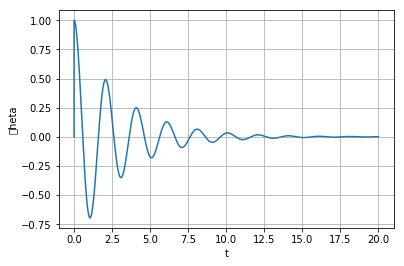

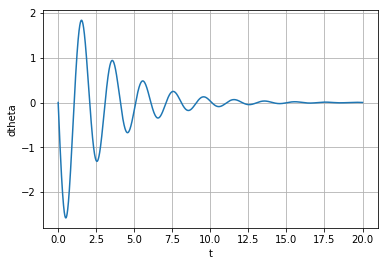

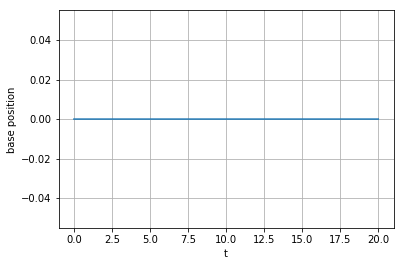

In [4]:
# Run this cell after running a simulation to plot traces
# of the pendulum state across time.
fields = ["\theta", "dtheta", "base position"]
for i in range(3):
    #plt.subplot(3, 1, i+1)
    plt.plot(logger.sample_times(), logger.data()[i, :].transpose())
    plt.xlabel('t')
    plt.ylabel(fields[i])
    plt.grid(True)
    plt.show()

In [114]:
def pendDynamics(z,t,g,l,m,b,u):
    theta = z[0]
    thetadot = z[1]
    thetadotdot = np.dot(-g/l,np.sin(theta))-np.dot(b/(l**2*m),thetadot)-u/(m*l**2)
    return [thetadot, thetadotdot]

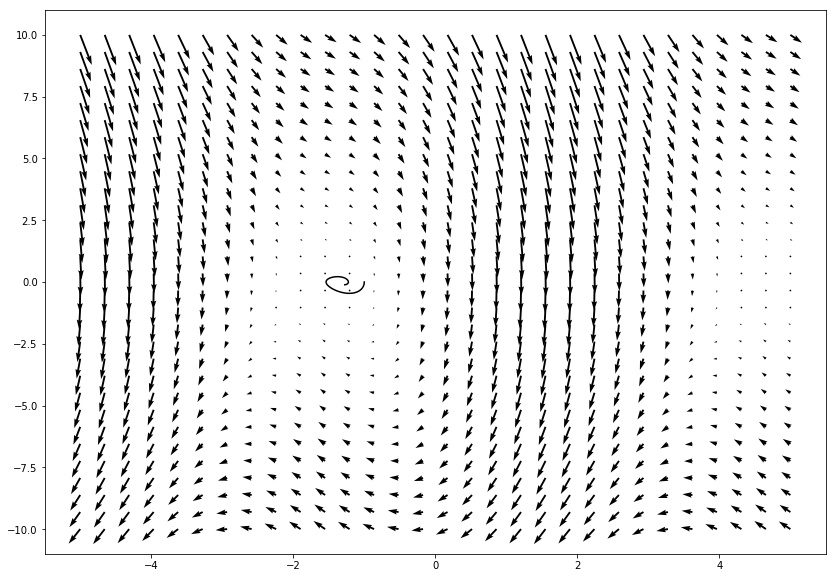

In [135]:
N = 30
u = 29
theta = np.linspace(-5,5,N)
thetadot = np.linspace(-10,10,N)
Theta, Thetadot = np.meshgrid(theta,thetadot)

Thetadot,Thetadotdot = pendDynamics([Theta,Thetadot],0,g,l,m,b,u)

from scipy import integrate
t_span = np.linspace(0,5,1000)
z = integrate.odeint(pendDynamics,[-1,0],t_span,args = (g,l,m,b,u))

fig, ax = plt.subplots(figsize = (14,10))
q = ax.quiver(Theta, Thetadot, Thetadot, Thetadotdot)
plt.plot(z[:,0],z[:,1],color='k')
        
